In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as LK
import tensorflow.keras.models as MK
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

In [ ]:
#trabajar con un dataseT llamado CIFAR10
#https://www.cs.toronto.edu/~kriz/cifar.html
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test, y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
print("Imagenes de entrenamiento: {0}, Etiquetas:{1}".format(x_train.shape, y_train.shape))
print("Imagenes de validacion: {0}, Etiquetas:{1}".format(x_test.shape, y_test.shape))

Imagenes de entrenamiento: (50000, 32, 32, 3), Etiquetas:(50000, 1)
Imagenes de validacion: (10000, 32, 32, 3), Etiquetas:(10000, 1)


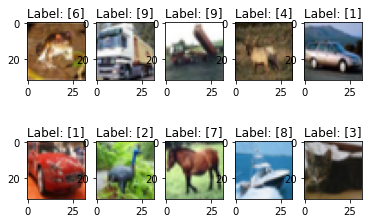

In [ ]:
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_train[i])
  plt.gca().set_title('Label: ' + str(y_train[i]))
plt.show()

In [ ]:
#Normalizando las imagenes entre 0 y 1, estas entonces entraran a ser flotantes. Las imagenes son UINT8
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
x_train = (x_train-x_train.min())/(x_train.max()-x_train.min())
x_test = (x_test-x_test.min())/(x_test.max()-x_test.min())



In [ ]:
#La CNN que vamos a realizar es basada en el trabajo de Simonyan y Zisserman VGG16 ganadores de ImageNet Challenge 2014
#https://www.researchgate.net/figure/Schematic-diagram-of-the-VGG16-CNN-architecture-Credit-https-neurohiveio-en_fig4_352394543
#Inicializadores Kaiming He (2015)

def crear_modelo():
  inputs  = LK.Input(shape=(32,32,3))
  conv1 = LK.Conv2D(32,(3,3), padding='same',kernel_initializer='he_normal', activation='relu')(inputs)
  conv2 = LK.Conv2D(32,(3,3), padding='same',kernel_initializer='he_normal', activation='relu')(conv1)
  pool1 = LK.MaxPool2D((2,2),(2,2))(conv2)
  flat = LK.Flatten()(pool1)
  FC1 = LK.Dense(128, activation='relu', kernel_initializer='he_normal')(flat)
  outputs = LK.Dense(10,activation='softmax')(FC1)

  return MK.Model(inputs, outputs)




In [ ]:
#mODELO DE 3 segmentos
def crear_modelo2():
  inputs  = LK.Input(shape=(32,32,3))
  conv1 = LK.Conv2D(32,(3,3), padding='same',kernel_initializer='he_normal', activation='relu')(inputs)
  conv2 = LK.Conv2D(32,(3,3), padding='same',kernel_initializer='he_normal', activation='relu')(conv1)
  pool1 = LK.MaxPool2D((2,2),(2,2))(conv2)
  conv3 = LK.Conv2D(64,(3,3), padding='same',kernel_initializer='he_normal', activation='relu')(pool1)
  conv4 = LK.Conv2D(64,(3,3), padding='same',kernel_initializer='he_normal', activation='relu')(conv3)
  pool2 = LK.MaxPool2D((2,2),(2,2))(conv4)
  conv5 = LK.Conv2D(128,(3,3), padding='same',kernel_initializer='he_normal', activation='relu')(pool2)
  conv6 = LK.Conv2D(128,(3,3), padding='same',kernel_initializer='he_normal', activation='relu')(conv5)
  pool3 = LK.MaxPool2D((2,2),(2,2))(conv6)
  flat = LK.Flatten()(pool3)
  FC1 = LK.Dense(128, activation='relu', kernel_initializer='he_normal')(flat)
  outputs = LK.Dense(10,activation='softmax')(FC1)

  return MK.Model(inputs, outputs)

In [ ]:
#Probar  que si esta activada la GPU
device = tf.test.gpu_device_name()
if device !='/device:GPU:0':
  raise SystemError('No se encontró una GPU')
print('GPU encontrada:{}'.format(device))


GPU encontrada:/device:GPU:0


In [ ]:
tf.keras.backend.clear_session

<function keras.backend.clear_session>

In [ ]:
estrategia = tf.device('/device:GPU:0')
optimo = SGD(learning_rate=0.001, momentum=0.9)
with estrategia:
  modelo1 = crear_modelo()
  modelo1.compile(optimizer=optimo, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelo1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                             

In [ ]:
history1 = modelo1.fit(x_train,y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test), verbose=1)
loss, acc = modelo1.evaluate(x_test, y_test, verbose=1)
print('Loss: {0}  -  Accuracy: {1}'.format(loss, acc))


Epoch 1/50
782/782 [==============================] - 6s 8ms/step - loss: 1.7512 - accuracy: 0.3750 - val_loss: 1.5056 - val_accuracy: 0.4613
Epoch 2/50
782/782 [==============================] - 5s 6ms/step - loss: 1.4112 - accuracy: 0.4975 - val_loss: 1.3889 - val_accuracy: 0.5093
Epoch 3/50
782/782 [==============================] - 5s 6ms/step - loss: 1.2764 - accuracy: 0.5479 - val_loss: 1.2749 - val_accuracy: 0.5496
Epoch 4/50
782/782 [==============================] - 4s 6ms/step - loss: 1.1883 - accuracy: 0.5822 - val_loss: 1.1932 - val_accuracy: 0.5786
Epoch 5/50
782/782 [==============================] - 5s 6ms/step - loss: 1.1011 - accuracy: 0.6131 - val_loss: 1.1238 - val_accuracy: 0.6073
Epoch 6/50
782/782 [==============================] - 5s 6ms/step - loss: 1.0274 - accuracy: 0.6389 - val_loss: 1.0816 - val_accuracy: 0.6210
Epoch 7/50
782/782 [==============================] - 5s 6ms/step - loss: 0.9587 - accuracy: 0.6666 - val_loss: 1.0426 - val_accuracy: 0.6355
Epoch 

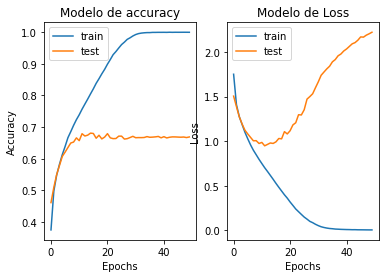

In [ ]:
plt.subplot(1,2,1),plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Modelo de accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'], loc='upper left')

plt.subplot(1,2,2),plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Modelo de Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
#MODELO 2
estrategia = tf.device('/device:GPU:0')
optimo = SGD(learning_rate=0.001, momentum=0.9)
with estrategia:
  modelo2 = crear_modelo2()
  modelo2.compile(optimizer=optimo, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelo2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        36928     
                                                           

In [ ]:
history2 = modelo2.fit(x_train,y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test), verbose=1)
loss2, acc2 = modelo2.evaluate(x_test, y_test, verbose=1)
print('Loss: {0}  -  Accuracy: {1}'.format(loss2, acc2))


Epoch 1/50
782/782 [==============================] - 27s 22ms/step - loss: 1.7331 - accuracy: 0.3742 - val_loss: 1.5104 - val_accuracy: 0.4572
Epoch 2/50
782/782 [==============================] - 17s 21ms/step - loss: 1.3634 - accuracy: 0.5148 - val_loss: 1.2812 - val_accuracy: 0.5406
Epoch 3/50
782/782 [==============================] - 17s 21ms/step - loss: 1.1940 - accuracy: 0.5764 - val_loss: 1.1282 - val_accuracy: 0.6027
Epoch 4/50
782/782 [==============================] - 16s 21ms/step - loss: 1.0704 - accuracy: 0.6237 - val_loss: 1.1167 - val_accuracy: 0.6057
Epoch 5/50
782/782 [==============================] - 17s 21ms/step - loss: 0.9690 - accuracy: 0.6594 - val_loss: 1.0194 - val_accuracy: 0.6453
Epoch 6/50
782/782 [==============================] - 18s 23ms/step - loss: 0.8834 - accuracy: 0.6910 - val_loss: 1.0345 - val_accuracy: 0.6427
Epoch 7/50
782/782 [==============================] - 17s 21ms/step - loss: 0.8175 - accuracy: 0.7149 - val_loss: 0.9380 - val_accuracy:

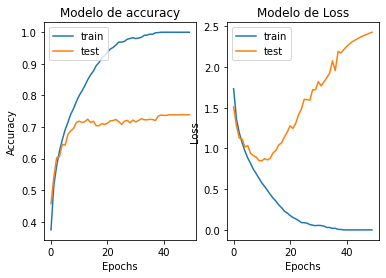

In [ ]:
plt.subplot(1,2,1),plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Modelo de accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'], loc='upper left')

plt.subplot(1,2,2),plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Modelo de Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
print('%.3f' % (loss2))

2.427


In [ ]:
#Modelo 3: Vgg16 3 segmentos + Dropout
def crear_modelo3():
  inputs  = LK.Input(shape=(32,32,3))
  conv1 = LK.Conv2D(32,(3,3), padding='same',kernel_initializer='he_normal', activation='relu')(inputs)
  conv2 = LK.Conv2D(32,(3,3), padding='same',kernel_initializer='he_normal', activation='relu')(conv1)
  pool1 = LK.MaxPool2D((2,2),(2,2))(conv2)
  drop1 = LK.Dropout(0.5)(pool1)
  conv3 = LK.Conv2D(64,(3,3), padding='same',kernel_initializer='he_normal', activation='relu')(drop1)
  conv4 = LK.Conv2D(64,(3,3), padding='same',kernel_initializer='he_normal', activation='relu')(conv3)
  pool2 = LK.MaxPool2D((2,2),(2,2))(conv4)
  drop2 = LK.Dropout(0.5)(pool2)
  conv5 = LK.Conv2D(128,(3,3), padding='same',kernel_initializer='he_normal', activation='relu')(drop2)
  conv6 = LK.Conv2D(128,(3,3), padding='same',kernel_initializer='he_normal', activation='relu')(conv5)
  pool3 = LK.MaxPool2D((2,2),(2,2))(conv6)
  drop3 = LK.Dropout(0.5)(pool3)
  flat = LK.Flatten()(drop3)
  FC1 = LK.Dense(128, activation='relu', kernel_initializer='he_normal')(flat)
  outputs = LK.Dense(10,activation='softmax')(FC1)

  return MK.Model(inputs, outputs)

In [ ]:
#MODELO 3
estrategia = tf.device('/device:GPU:0')
optimo = SGD(learning_rate=0.001, momentum=0.9)
with estrategia:
  modelo3 = crear_modelo3()
  modelo3.compile(optimizer=optimo, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelo3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                           

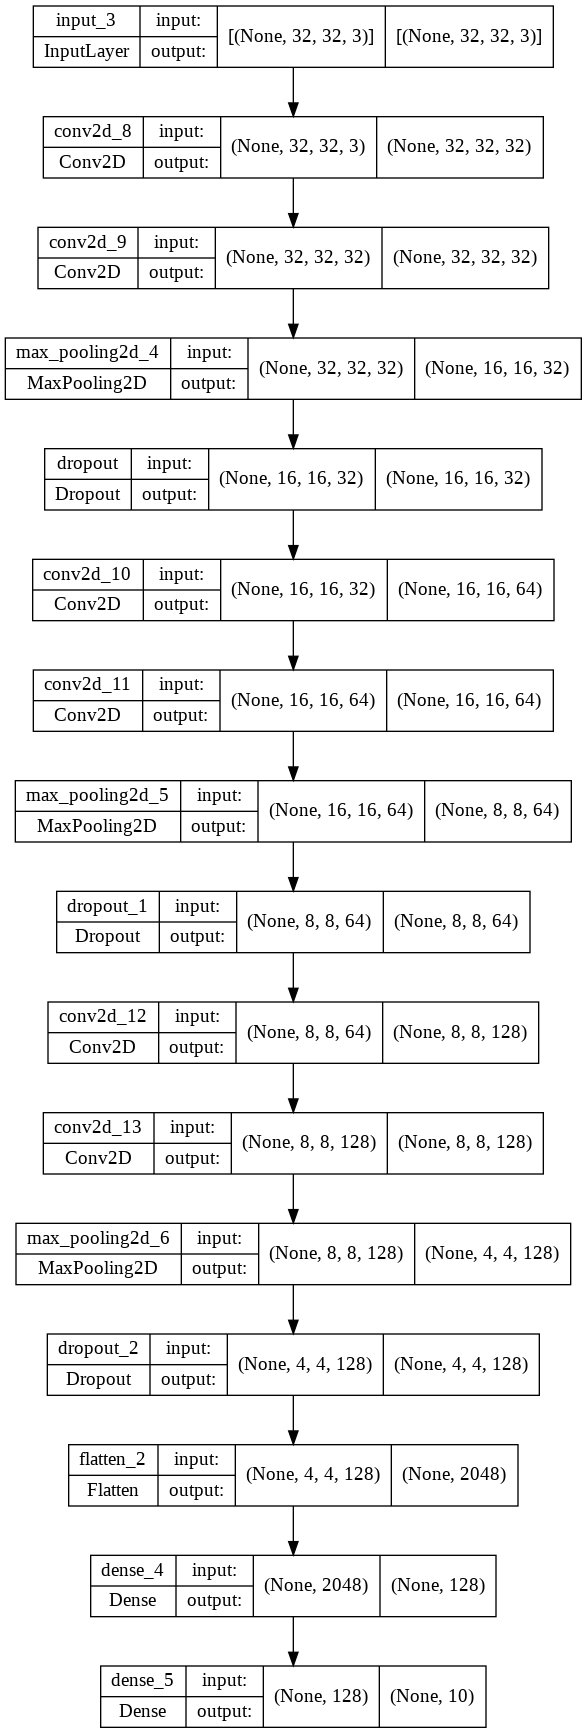

In [ ]:
#visualizacion de la cnn
from keras.utils.vis_utils import plot_model
plot_model(modelo3, 'VGG16_3S_Dropout.png', show_shapes=True)

In [ ]:
history3 = modelo3.fit(x_train,y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test), verbose=1)
loss3, acc3 = modelo3.evaluate(x_test, y_test, verbose=1)
print('Loss: {0}  -  Accuracy: {1}'.format(loss3, acc3))

Epoch 1/50
782/782 [==============================] - 18s 22ms/step - loss: 2.2039 - accuracy: 0.1683 - val_loss: 2.0221 - val_accuracy: 0.2496
Epoch 2/50
782/782 [==============================] - 17s 22ms/step - loss: 1.8440 - accuracy: 0.3038 - val_loss: 1.7533 - val_accuracy: 0.3584
Epoch 3/50
782/782 [==============================] - 17s 22ms/step - loss: 1.6965 - accuracy: 0.3645 - val_loss: 1.6639 - val_accuracy: 0.3890
Epoch 4/50
782/782 [==============================] - 17s 22ms/step - loss: 1.6179 - accuracy: 0.3994 - val_loss: 1.6054 - val_accuracy: 0.4193
Epoch 5/50
782/782 [==============================] - 17s 22ms/step - loss: 1.5492 - accuracy: 0.4272 - val_loss: 1.4905 - val_accuracy: 0.4566
Epoch 6/50
782/782 [==============================] - 17s 22ms/step - loss: 1.4847 - accuracy: 0.4517 - val_loss: 1.4859 - val_accuracy: 0.4594
Epoch 7/50
782/782 [==============================] - 19s 24ms/step - loss: 1.4302 - accuracy: 0.4757 - val_loss: 1.4919 - val_accuracy:

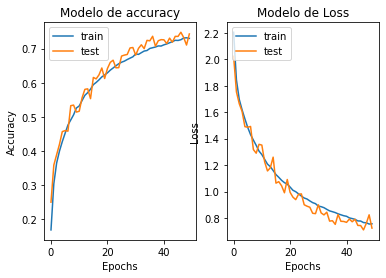

In [ ]:
plt.subplot(1,2,1),plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Modelo de accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'], loc='upper left')

plt.subplot(1,2,2),plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Modelo de Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
#Metodo de data augmentation - Aprender a usar el metodo de Keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from numpy import expand_dims



In [ ]:
datagen = ImageDataGenerator()
img = load_img('leon.jpg')
img_array = img_to_array(img) #Estamos pasando la imagen de formato PIL a un arreglo
img_sam = expand_dims(img_array, 0)
print(type(img))
print(img_array.dtype)
print(img_array.shape)
print(img_sam.shape)


<class 'PIL.JpegImagePlugin.JpegImageFile'>
float32
(168, 300, 3)
(1, 168, 300, 3)


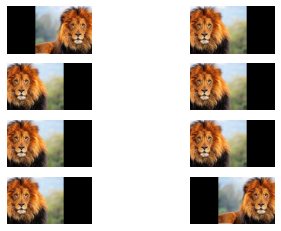

In [ ]:
#Creando  saltos a lo ancho de la imagen
datagen = ImageDataGenerator(width_shift_range=[-100, 100],fill_mode='constant')
itera = datagen.flow(img_sam, batch_size=1)
#generar y graficar
for i in range(8):
  batch= itera.next()
  new_img = batch[0].astype('uint8')
  plt.subplot(4,2,i+1)
  plt.imshow(new_img)
  plt.axis('off')
plt.show()

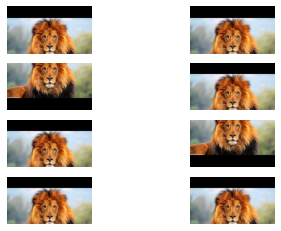

In [ ]:
#Creando  saltos a lo alto de la imagen
datagen = ImageDataGenerator(height_shift_range=[-0.25,0.25],fill_mode='constant')
itera = datagen.flow(img_sam, batch_size=1)
#generar y graficar
for i in range(8):
  batch= itera.next()
  new_img = batch[0].astype('uint8')
  plt.subplot(4,2,i+1)
  plt.imshow(new_img)
  plt.axis('off')
plt.show()

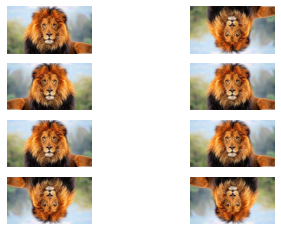

In [ ]:
#Creando  giros horizontales y verticales
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
itera = datagen.flow(img_sam, batch_size=1)
#generar y graficar
for i in range(8):
  batch= itera.next()
  new_img = batch[0].astype('uint8')
  plt.subplot(4,2,i+1)
  plt.imshow(new_img)
  plt.axis('off')
plt.show()

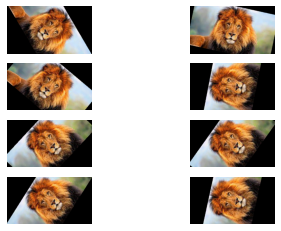

In [ ]:
#Creando rotaciones de la imagen
datagen = ImageDataGenerator(rotation_range=90, fill_mode='constant')
itera = datagen.flow(img_sam, batch_size=1)
#generar y graficar
for i in range(8):
  batch= itera.next()
  new_img = batch[0].astype('uint8')
  plt.subplot(4,2,i+1)
  plt.imshow(new_img)
  plt.axis('off')
plt.show()

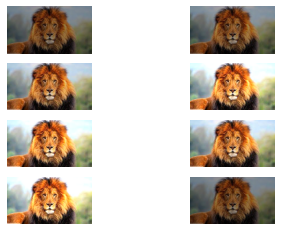

In [ ]:
#Creando variaciones al brillo de la imagen
datagen = ImageDataGenerator(brightness_range=[0.1,1.5])
itera = datagen.flow(img_sam, batch_size=1)
#generar y graficar
for i in range(8):
  batch= itera.next()
  new_img = batch[0].astype('uint8')
  plt.subplot(4,2,i+1)
  plt.imshow(new_img)
  plt.axis('off')
plt.show()

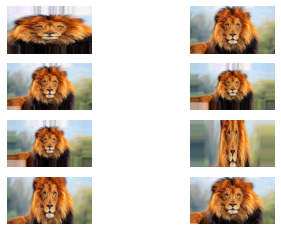

In [ ]:
#Creando zoom de la imagen
datagen = ImageDataGenerator(zoom_range=[0.5,1.5])
itera = datagen.flow(img_sam, batch_size=1)
#generar y graficar
for i in range(8):
  batch= itera.next()
  new_img = batch[0].astype('uint8')
  plt.subplot(4,2,i+1)
  plt.imshow(new_img)
  plt.axis('off')
plt.show()

In [ ]:
from keras.preprocessing.image import  ImageDataGenerator
from keras.utils import np_utils


In [ ]:
y_train_cat = np_utils.to_categorical(y_train, 10)
y_test_cat = np_utils.to_categorical(y_test, 10)
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(x_train)
iterator = datagen.flow(x_train,y_train_cat, batch_size=64)
iterator_test = datagen.flow(x_test,y_test_cat, batch_size=64)


In [ ]:
#MODELO 4
estrategia = tf.device('/device:GPU:0')
optimo = SGD(learning_rate=0.001, momentum=0.9)
with estrategia:
  modelo4 = crear_modelo2()
  modelo4.compile(optimizer=optimo, loss='categorical_crossentropy', metrics=['accuracy'])
modelo4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 64)        36928     
                                                           

In [ ]:
#entrenar el modelo 4
history4 = modelo4.fit(iterator, epochs=50, steps_per_epoch=int(x_train.shape[0]/64), validation_data=(iterator_test), verbose=1)
loss4, acc4 = modelo4.evaluate(x_test, y_test_cat, verbose=1)
print('Loss: {0}  -  Accuracy: {1}'.format(loss4, acc4))

Epoch 1/50
781/781 [==============================] - 49s 62ms/step - loss: 1.8329 - accuracy: 0.3347 - val_loss: 1.6496 - val_accuracy: 0.4094
Epoch 2/50
781/781 [==============================] - 50s 64ms/step - loss: 1.5415 - accuracy: 0.4432 - val_loss: 1.4436 - val_accuracy: 0.4850
Epoch 3/50
781/781 [==============================] - 50s 64ms/step - loss: 1.4159 - accuracy: 0.4910 - val_loss: 1.3444 - val_accuracy: 0.5155
Epoch 4/50
781/781 [==============================] - 50s 64ms/step - loss: 1.3244 - accuracy: 0.5245 - val_loss: 1.2838 - val_accuracy: 0.5478
Epoch 5/50
781/781 [==============================] - 50s 64ms/step - loss: 1.2372 - accuracy: 0.5615 - val_loss: 1.2465 - val_accuracy: 0.5484
Epoch 6/50
781/781 [==============================] - 50s 64ms/step - loss: 1.1723 - accuracy: 0.5822 - val_loss: 1.1282 - val_accuracy: 0.6059
Epoch 7/50
781/781 [==============================] - 49s 63ms/step - loss: 1.1217 - accuracy: 0.6032 - val_loss: 1.1206 - val_accuracy:

In [ ]:
#Modelo 5: Modelo VGG16 de 3 segmentos + regularizacion L2
#mODELO DE 3 segmentos
from keras.regularizers import l2
def crear_modelo5():
  inputs  = LK.Input(shape=(32,32,3))
  conv1 = LK.Conv2D(32,(3,3), padding='same',kernel_initializer='he_normal', kernel_regularizer=l2(0.01), activation='relu')(inputs)
  conv2 = LK.Conv2D(32,(3,3), padding='same',kernel_initializer='he_normal', kernel_regularizer=l2(0.01), activation='relu')(conv1)
  pool1 = LK.MaxPool2D((2,2),(2,2))(conv2)
  conv3 = LK.Conv2D(64,(3,3), padding='same',kernel_initializer='he_normal',kernel_regularizer=l2(0.01), activation='relu')(pool1)
  conv4 = LK.Conv2D(64,(3,3), padding='same',kernel_initializer='he_normal',kernel_regularizer=l2(0.01), activation='relu')(conv3)
  pool2 = LK.MaxPool2D((2,2),(2,2))(conv4)
  conv5 = LK.Conv2D(128,(3,3), padding='same',kernel_initializer='he_normal',kernel_regularizer=l2(0.01), activation='relu')(pool2)
  conv6 = LK.Conv2D(128,(3,3), padding='same',kernel_initializer='he_normal',kernel_regularizer=l2(0.01), activation='relu')(conv5)
  pool3 = LK.MaxPool2D((2,2),(2,2))(conv6)
  flat = LK.Flatten()(pool3)
  FC1 = LK.Dense(128, activation='relu', kernel_initializer='he_normal',kernel_regularizer=l2(0.01))(flat)
  outputs = LK.Dense(10,activation='softmax')(FC1)

  return MK.Model(inputs, outputs)

In [ ]:
#MODELO 5
estrategia = tf.device('/device:GPU:0')
optimo = SGD(learning_rate=0.001, momentum=0.9)
with estrategia:
  modelo5 = crear_modelo5()
  modelo5.compile(optimizer=optimo, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelo5.summary()

In [ ]:
history5 = modelo5.fit(x_train,y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test), verbose=1)
loss5, acc5 = modelo5.evaluate(x_test, y_test, verbose=1)
print('Loss: {0}  -  Accuracy: {1}'.format(loss5, acc5))